# Bundeswettbewerb KI
## Kennenlernen der Daten

In [1]:
import numpy as np

Lädt die Daten

In [5]:
D = np.load('train_data.npy')

Gibt die Anzahl der Datensätze und die Anzahl der Merkmale aus

In [8]:
print(D.shape)

(426, 14)


Stellt die Daten mit Hilfe eines Histogramms dar

Populating the interactive namespace from numpy and matplotlib


C:\Users\Sabine\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sum', 'cla']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


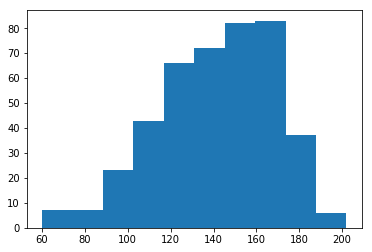

In [86]:
%pylab inline
hist(D[:, 7])
show()

Berechnet den Durchschnitt über einen Wert

In [12]:
np.mean(D[:,7])

141.50835065035017

Filtert Datensätze

In [87]:
krank = D[D[:, 13] == 1]

In [88]:
gesund = D[D[:, 13] == 0]

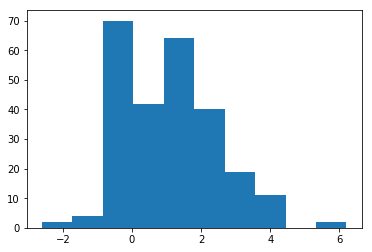

In [91]:
hist(krank[:, 9])
show()

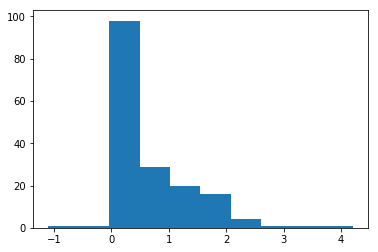

In [92]:
hist(gesund[:, 9])
show()

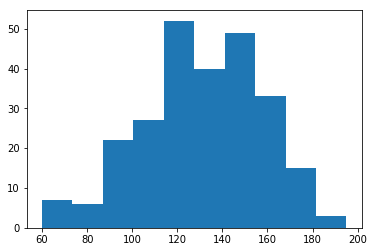

In [94]:
hist(krank[:, 7])
show()

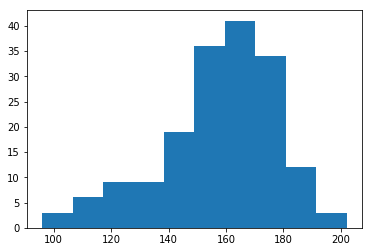

In [93]:
hist(gesund[:, 7])
show()

In [18]:
np.mean(krank[:,7])

130.76991093326447

In [19]:
def constant_classifier(features):
    """Klassifiziert jeden Hund als krank.

    Args:
        features (numpy.ndarray): Vektor mit den Eigenschaften eines Hundes:
            - pro Eigenschaft ein Wert

    Returns:
        int: 0 bedeutet, der Hund ist gesund,
            1 bedeutet, der Hund ist krank.
    """
    c = 1
    # gib zurück, dass der Hund krank ist
    return c

In [74]:
def random_classifier(features):
    c = np.random.randint(2)  # ziehe zufällig 0 oder 1
    return c

In [69]:
def classifier_using_heartrate(D):
    """Klassifizierer anhand der Herzfrequenz.
    Args:
        D (numpy.ndarray): Datenmatrix:
            - pro Hund eine Zeile (erster Index)
            - pro Eigenschaft eine Spalte (zweiter Index)

    Returns:
        function: Klassifiziert Vektoren mit Merkmalen.
    """
    # Schwellenwert wird gesetzt
    median_threshold = np.median(D[:, 7])

    def heart_rate_based_classifier(features, threshold=median_threshold):
        """Klassifiziert jeden Hunde anhand der Herzfrequenz.

        Args:
            features (numpy.ndarray): Vektor mit den Eigenschaften eines Hundes:
                - pro Eigenschaft ein Wert
            threshold (float): Schwellenwert zum Unterscheiden des Gesundheitszustands.

        Returns:
            int: 0 bedeutet, der Hund ist gesund,
                1 bedeutet, der Hund ist krank.
        """
        if (features[7]<threshold):
            c=1
        else:
            c=0
       
        return c

    return heart_rate_based_classifier

In [70]:
def accuracy(D, classifier):
    """Berechnung der Accuracy eines Klassifizierers.

    Args:
        D (numpy.ndarray): Datenmatrix:
            - pro Hund eine Zeile (erster Index)
            - pro Eigenschaft eine Spalte (zweiter Index)
        classifier (function): Ein beliebiger Klassifizierer.

    Returns:
        float: Accuracy des Klassifizierers. (1 bedeutet, dass
            alles richtig klassifiziert wurde, 0.5 heißt, dass
            die Hälfte richtig klassifiziert wurde, bei 0 wurde
            alles falsch klassifiziert.)
    """
    correct = []
    for k, feature in enumerate(D[:]):
        if D[k,13] == classifier(feature):
            correct.append(1)
        else:
            correct.append(0)
    acc=np.mean(correct)
    return acc


In [71]:
hc = classifier_using_heartrate(D)

In [73]:
accuracy(D,hc)

0.715962441314554

In [147]:
def lin_classifier(features, w1=1, w2=1.1, threshold=0.3):
    """Klassifiziert jeden Hunde anhand der Herzfrequenz.

        Args:
            features (numpy.ndarray): Vektor mit den Eigenschaften eines Hundes:
                - pro Eigenschaft ein Wert
            w1 (float): Gewichtet die Herzfrequenz.
            w2 (float): Gewichtet die ST Depression.
            threshold (float): Grenzwert zum unterscheiden des Gesundheitszustands.

        Returns:
            int: 0 bedeutet, der Hund ist gesund,
                1 bedeutet, der Hund ist krank.
        """
    
    wert = w1*(features[7]-50)/150-w2*(features[9]+2)/10
    if wert < threshold:
        c = 1
    else:
        c = 0
  
    return c

In [95]:
median_threshold = np.median(D[:, 9])


In [96]:
print(median_threshold)

0.6


In [148]:
accuracy(D,lin_classifier)

0.7488262910798122

In [97]:
print(245/0.6)

408.33333333333337


In [141]:
def wertbestimmen(w1,w2):
    wert1 = []
    wert2 = []

    for k, feature in enumerate(krank[:]):
        wert1.append(w1*(feature[7]-50)/150-w2*(feature[9]+2)/10)
    print(np.median(wert1))
    
    for k, feature in enumerate(gesund[:]):
        wert2.append(w1*(feature[7]-50)/150-w2*(feature[9]+2)/10)
    print(np.median(wert2))
    
    hist(wert1)
    show()
    hist(wert2)
    show()
    


0.17737179487179486
0.46


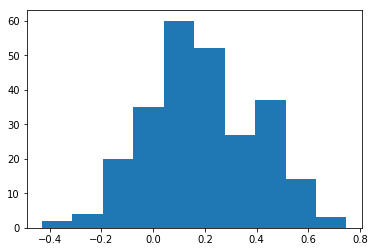

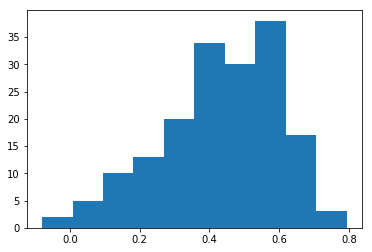

In [144]:
wertbestimmen(1,1.1)

In [138]:
hist(wert1)
show()

NameError: name 'wert1' is not defined

In [156]:
def sigmoid(x):
    """Sigmoid Funktion
    Args:
        x (float): Wert auf den die Sigmoid-Funktion angewendet wird

    Returns:
         float: Transformier Wert.

    Note:
        Verwende die np.exp Funktion.
    """
    sigm = 1/(1+np.exp(-x))
    return sigm


def p(features, w1, w2, b):
    """Wahrscheinlichkeit dass der Hund krank ist.

    Args:
        features (numpy.ndarray): Vektor mit den Eigenschaften eines Hundes:
                - pro Eigenschaft ein Wert
        w1 (float): Gewichtet die Herzfrequenz.
        w2 (float): Gewichtet die ST Depression.
        b (float): Verschiebung zum unterscheiden des Gesundheitszustands.

        Returns:
            int: 0 bedeutet, der Hund ist gesund,
                1 bedeutet, der Hund ist krank.

    """
    f = np.array([features[7], features[9]])
    w = np.array([w1,w2])
    prob = sigmoid(np.dot(f,w)+b)
    return prob


In [ ]:
  prob = sigmoid(w*features[7]+b)

In [176]:
w=0.01
herz = np.array([0,0,0,0,0,0,0,w,0,0,0,0,0,0])


In [179]:
erg = sigmoid(np.dot(D[:10],herz)-1)
print(erg)


[0.62245933 0.51998934 0.57199613 0.7047457  0.67260702 0.68568011
 0.64565631 0.65248946 0.61538376 0.63413559]


In [172]:
b=-1
print(sigmoid(erg+b))


[0.62245933 0.51998934 0.57199613 0.7047457  0.67260702 0.68568011
 0.64565631 0.65248946 0.61538376 0.63413559 0.61774787 0.62948311
 0.60348325 0.67480527 0.65021855 0.67699586 0.6637387  0.64565631
 0.5962827  0.67040116 0.60825903 0.65021855 0.64565631 0.67480527
 0.57932425 0.64106741 0.67260702 0.53494295 0.67040116 0.53494295
 0.62480647 0.64565631 0.64106741 0.6479408  0.68783133 0.68568011
 0.549834   0.52996405 0.57932425 0.59145898 0.53494295 0.68568011
 0.65021855 0.63876318 0.66596693 0.65701046 0.55724785 0.56954622
 0.63876318 0.62714777 0.6637387  0.59868766 0.62948311 0.70682222
 0.60825903 0.52248482 0.65248946 0.64106741 0.62714777 0.5621765
 0.60348325 0.64565631 0.57688526 0.66818777 0.53245431 0.60348325
 0.63413559 0.65701046 0.59868766 0.61538376 0.61774787 0.65248946
 0.49750002 0.64106741 0.68352089 0.62480647 0.60108788 0.60348325
 0.68997448 0.5274723  0.61774787 0.60587367 0.69423634 0.62245933
 0.67260702 0.68997448 0.63645254 0.53742985 0.64565631 0.62010

In [173]:
a = np.array([1,2,3])
print(a)

[1 2 3]


In [174]:
print(a+2)

[3 4 5]
